## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 5 #

### esercizio 5.1 

In questa esercitazione abbiamo usato l'algoritmo di Metropolis al fine di campionare una distribuzione di probabilità. Nello specifico le distribuzioni in questione erano i moduli quadri di due autofunzioni dell'atomo di idrogeno. In fisica quantistica una funzione d'onda $\Psi$ è la descrizione matematica dello stato di un sistema. Questa è interpretata come un'ampiezza di probabilità e pertanto il suo modulo quadro $|\Psi(\vec{r},t)|^2$ è interpretato come una densità di probabilità. 

Abbiamo usato l'algoritmo di Metropolis proprio per campionare $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$, i moduli quadri di quadri delle funzioni d'onda dell'idrogeno associate ai numeri quantici $(n, l, m) = (1, 0, 0)$ e $(n, l, m) = (2, 1, 0)$, rispettivamente gli stati $1s$ e $2p$.

Esplicitamente le funzioni d'onda sono le seguenti:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
I valori di aspettazione del raggio sono:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Nel corso dell'esercitazione abbiamo espresso il raggio $r$ in unità di raggio di Bohr $a_0$.

Abbiamo inziato l'esercizio utilizzando una probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme per l'algoritmo di Metropolis.

#### Probabilità di transizione uniforme

L'algoritmo di Metropolis funziona solo asintoticamente, pertanto dobbiamo tenere conto dei suoi risultati solo una volta appurato che il sistema sia in una condizione di equilibrio. Per fare ciò conviene far partire l'algortitmo in corrispondenza di valori del raggio simili ai valori medi previsti dalla distribuzione di probabilità. Abbiamo tuttavia testato l'algoritmo facendo inizialmente partire la simulazione da un punto lontano dall'origine e dai valori medi attesi, $P = (15, 0, 0)$, salvo poi andare a studiare l'evoluzione del valore del raggio in funzione del numero di step. Nel momento in cui il valore del raggio si è stabilizzato intorno al valore medio previsto abbiamo potuto appurare il raggiungimento dell'equilibrio della simulazione.



Riportiamo i risultati ottenuti:


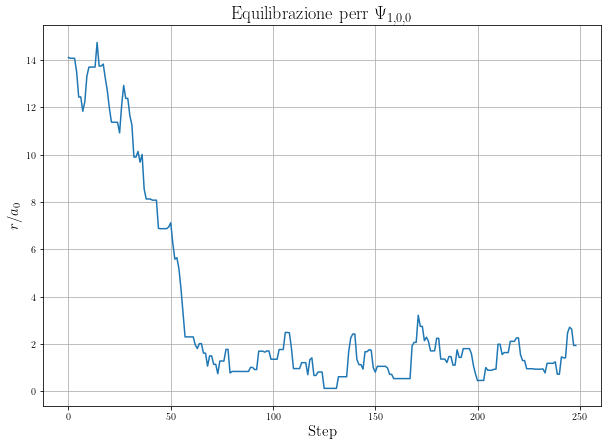

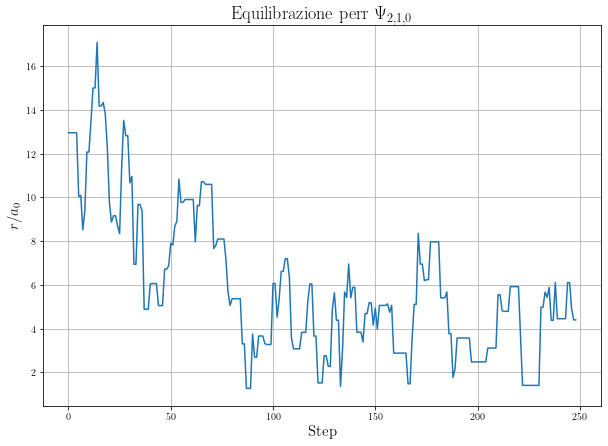

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

y = np.loadtxt('r_eq_1s.txt')
x = np.arange(y.size)

plt.figure(figsize=(10,7))

plt.plot(x,y)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$r/a_0$', fontsize=15)
plt.title('Equilibrazione perr $\Psi_{1,0,0}$ ', fontsize=18)
plt.grid(True)

import matplotlib.pyplot as plt
import numpy as np


y = np.loadtxt('r_eq2p.txt')
x = np.arange(y.size)

plt.figure(figsize=(10,7))

plt.plot(x,y)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$r/a_0$', fontsize=15)
plt.title('Equilibrazione perr $\Psi_{2,1,0}$ ', fontsize=18)
plt.grid(True)


Notiamo come in entrambi i casi in all'incirca, rispettivamente, circa 60 e circa 100 step si arrivi alla sopracitata condizione di equilibrio. Se fossimo pertanto partissimi a simulare daL punto P avremmo dovuto escludere il primo centinaio di punti.

Siamo tuttavia partiti da valori più ragionevoli, cioè:

$P = (1.5, 0, 0)$ per $\Psi_{1,0,0}$

$P = (5, 0, 0)$ per $\Psi_{2,1,0}$

In entrambi i casi dei punti il cui raggio corrispondeva al valore medio del raggio stesso.

Abbiamo successivamente testato il programma allo scopo di ottenere un valore adatto per il passo $\delta $dell'algortimo di Metropolis. La scelta si è basata sull'idea di avere un rapporto di accettazione di ogni passo pari a circa il 50%. Un'accettazione troppo bassa renderebbe l'algoritmo non performamte, una troppo alta renderebbe i passi troppo correlati. Aumentando $\delta$ diminuisce l'accettazione (è più facile uscire da zone di alta probabilità), la quale invece aumenta al diminuire di $\delta$.
Dopo un po' di tentativi siamo giunti ai seguenti valori ottimali:

$\delta = 2.45$ per $\Psi_{1,0,0}$

$\delta = 3$ per $\Psi_{2,1,0}$


Testato L'algoritmo, abbiamo stimato i valori medi del raggio per le due diverse funzioni d'onda. A questo scopo abbiamo implementato il data blocking, abbiamo diviso i $10^6$ step totali in $100$ blocchi da $10^4$ elementi ciascuno. In questo modo siamo riusciti ad ovviare agli effetti dell'autocorrelazione.

Riportiamo i risultati ottenuti per le due diverse configurazioni.

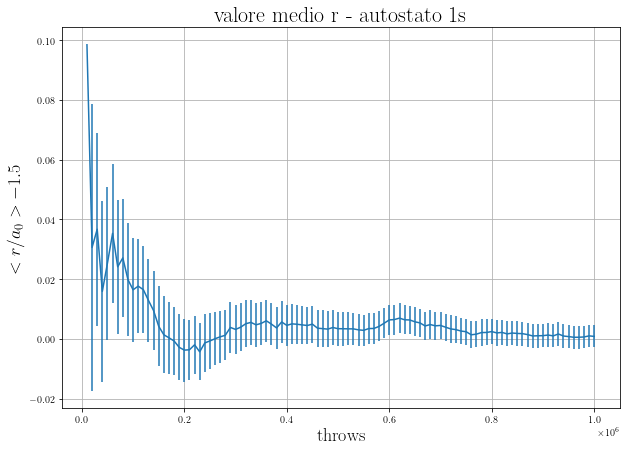

Risultato finale : 
1.50088
Errore statistico : 
0.00368652


In [4]:
x, f, error = np.loadtxt("rmedia1S.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10, 7))
plt.errorbar(x,f -1.5 ,yerr=error)
plt.xlabel('throws' , fontsize=18)
plt.ylabel('$< r/a_0 > - 1.5$', fontsize=18)
plt.title("valore medio r - autostato 1s", fontsize=22)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])


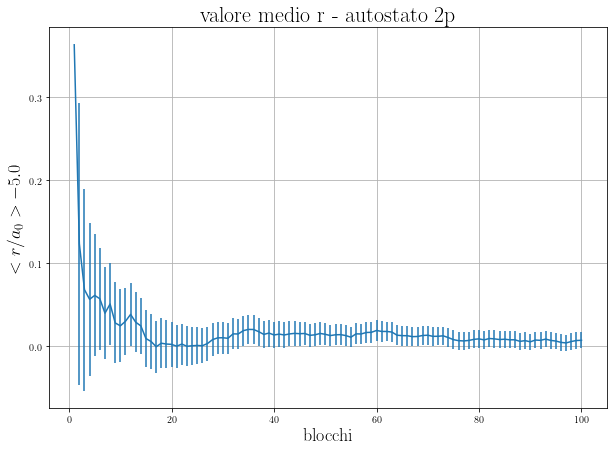

Risultato finale : 
5.00739
Errore statistico : 
0.00982825


In [5]:
x, f, error = np.loadtxt("rmedia2P.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10, 7))
plt.errorbar(x,f - 5.0 ,yerr=error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('$<r/a_0>- 5.0$', fontsize=18)
plt.title("valore medio r - autostato 2p", fontsize=22)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])

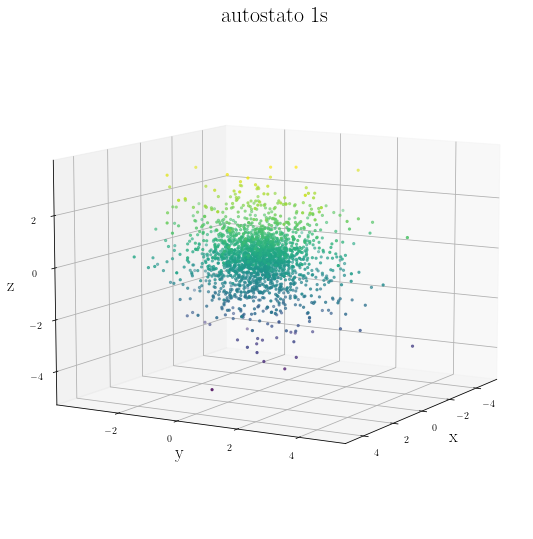

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.loadtxt("pos1S.txt", usecols=(0,1,2), delimiter=', ', unpack='true')

fig = plt.figure(figsize=(10, 7))

ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.view_init(10, 30)
plt.title("autostato 1s", fontsize=22)
plt.show()

Plottando la distribuzione spaziale dei punti campionati (in questo caso uno ogni 500) è possibile riconoscere la tipica distribuzione sferica associato all'autostato 1s dell'idrogeno.

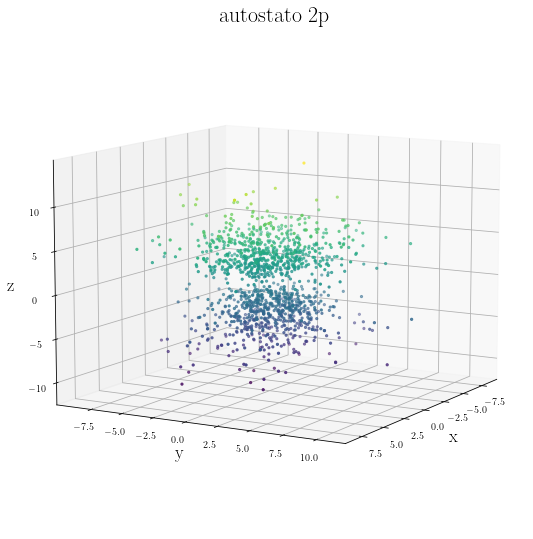

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.loadtxt("pos2P.txt", usecols=(0,1,2), delimiter=', ', unpack='true')

fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.view_init(10, 30)
plt.title("autostato 2p", fontsize=22)
plt.show()




Plottando la distribuzione spaziale dei punti campionati (in questo caso uno ogni 500) è possibile riconoscere la tipica distribuzione bilobata associata all'autostato 2p dell'idrogeno.

#### Probabilità di transizione gaussiana

Abbiamo ripetuto il procedimento di cui sopra andando però a cambiare la probabilità di transizione $T(\vec{x}|\vec{y})$ dell'algoritmo di Metropolis, ora di tipo gaussiano.

Riportiamo i risultati dell'equilibrazione.

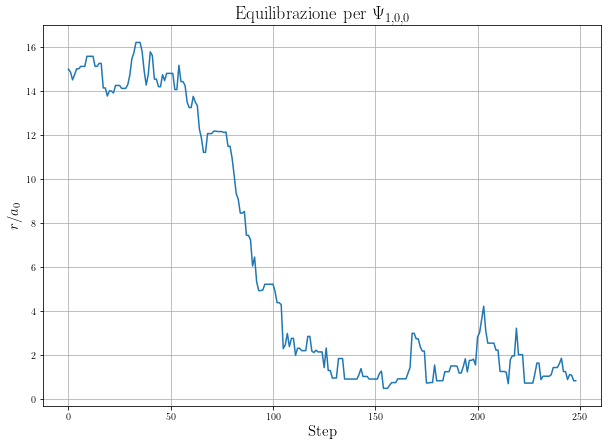

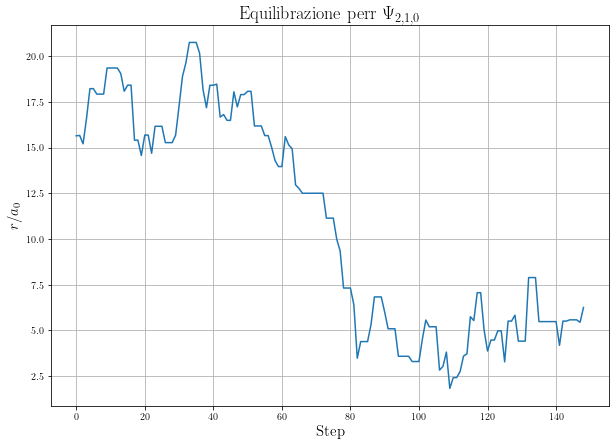

In [18]:
y = np.loadtxt('r_eq1s_gauss.txt')
x = np.arange(temp.size)

plt.figure(figsize=(10,7))

plt.plot(x,y)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$r/a_0$', fontsize=15)
plt.title('Equilibrazione per $\Psi_{1,0,0}$ ', fontsize=18)
plt.grid(True)

import matplotlib.pyplot as plt
import numpy as np


y1 = np.loadtxt('r_eq2p_gauss.txt')
x1 = np.arange(y1.size)

plt.figure(figsize=(10,7))

plt.plot(x1,y1)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$r/a_0$', fontsize=15)
plt.title('Equilibrazione perr $\Psi_{2,1,0}$ ', fontsize=18)
plt.grid(True)


Anche in questo caso è possibile notare come intorno ad un centinaio di step il sistema raggiunge l'equilibrio

Abbiamo fissato i valori di $\delta$ anche in questo caso allo scopo di ottenere un'accettazione di circa il 50%.
Per una transizione gaussiana la $\delta$ rappresenta la deviazione standard della distribuzione. I valori che abbiamo ritenuto ottimali sono:

$\delta = 0.75 $ per $\Psi_{1,0,0}$

$\delta = 1.85$ per $\Psi_{2,1,0}$

Riportiamo di seguito i risultati ottenuti per i valori medi del raggio. Anche in questo caso abbiamo ritenuto opportuno suddividere i $10^6$ step totali in $100$ blocchi da $10^4$ elementi ciascuno.


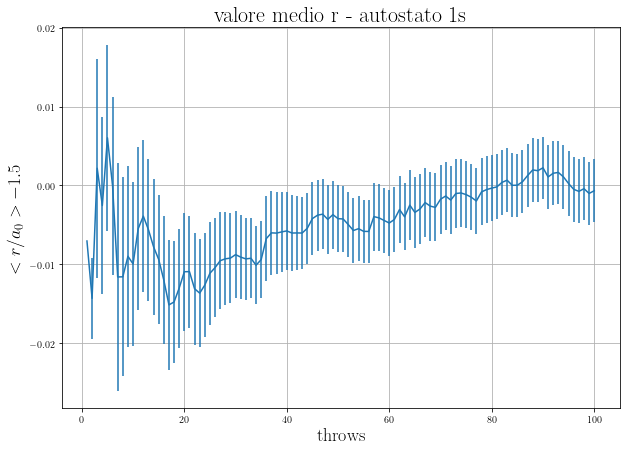

Risultato finale : 
1.49933
Errore statistico : 
0.00400816


In [30]:
x, f, error = np.loadtxt("rmedia1s_gauss.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10, 7))
plt.errorbar(x,f -1.5 ,yerr=error)
plt.xlabel('throws' , fontsize=18)
plt.ylabel('$< r/a_0 > - 1.5$', fontsize=18)
plt.title("valore medio r - autostato 1s", fontsize=22)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])


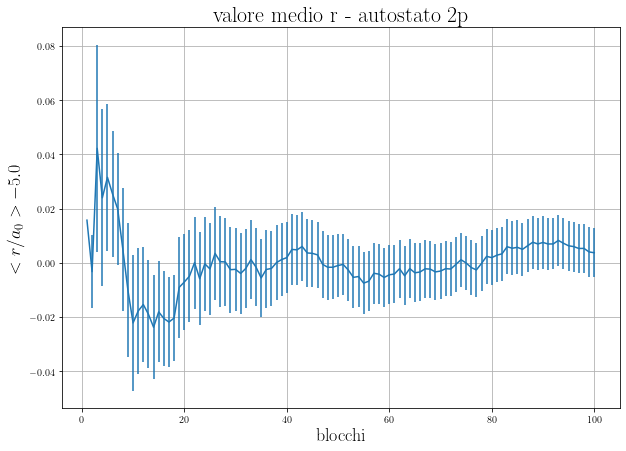

Risultato finale : 
5.00372
Errore statistico : 
0.00898295


In [7]:
x, f, error = np.loadtxt("rmedia2p_gauss.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.figure(figsize=(10, 7))
plt.errorbar(x,f - 5.0 ,yerr=error)
plt.xlabel('blocchi', fontsize=18)
plt.ylabel('$<r/a_0>- 5.0$', fontsize=18)
plt.title("valore medio r - autostato 2p", fontsize=22)
plt.grid(True)
plt.show()

print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])

I risultati ottenuti sono compatibii sia con quelli attesi che con quelli ottenuti con una transizione uniforme.